In [1]:
import pandas as pd
import ast

In [45]:
ft=pd.read_csv("comb.csv")["title"].apply(strip)

In [46]:
ft=list(ft)

In [47]:
len(ft)

1125

In [49]:
ss=list(pd.read_csv("semantic.csv")["title"].apply(strip))

In [50]:
ft.extend(ss)

In [51]:
ft[0]

'the development of japan special operations commands capability 21supstsup century samurai diplomats'

In [52]:
len(ft)

4141

In [17]:
df=pd.read_csv("ss+all.csv")

In [18]:
df

,Unnamed: 0,date,title,tag,author,abstract,text,url,journal,tag_clean
0,0,2017-05-24,The Development of Japan Special Operations Co...,"['Political science - Military science', 'Phil...",['Ryota Akiba'],it has been 71 years since japan experienced w...,the development of japan special operations co...,http://www.jstor.org/stable/resrep13997,Daniel K. Inouye Asia-Pacific Center for Secur...,"['political science', 'military science', 'phi..."
1,1,2017-01-01,@PhilosTEI:,['Information science - Informetrics'],[],the main objective of the clarinnl project ph...,up odijk odijkprinter page chapter philo...,http://www.jstor.org/stable/j.ctv3t5qjk.39,CLARIN in the Low Countries,"['information science', 'informetrics']"
2,2,2018-01-01,"Neither High-Church, Low-Church, nor No-Church...","['Arts - Literature', 'History - Historical me...",['Christian Dickinson'],church bleak house esther religious anglican c...,dickstudannu dickens studies annual vol no ...,ark://27927/phzjr66v4k5,Dickens Studies Annual: Essays on Victorian Fi...,"['arts', 'literature', 'history', 'historical ..."
3,3,2018-01-01,Searching for Dr. Johnson:,['Information science - Informetrics'],[],as you enter the rare books and music reading ...,part archival limits un chapter searching for...,http://www.jstor.org/stable/10.1163/j.ctvbqs8w9.8,Travelling Chronicles: News and Newspapers fro...,"['information science', 'informetrics']"
4,4,2018-09-01,“RESEARCH BASED ADVOCACY FOR POLICY CHANGE: Ba...,['Business - Industry'],"['Shiza Durrani', 'Hafsa Bashir', 'Mahmood A. ...",mercury is naturally occurring element in envi...,executive summary this report describes and di...,http://www.jstor.org/stable/resrep24369,Sustainable Development Policy Institute,"['business', 'industry']"
...,...,...,...,...,...,...,...,...,...,...
10353,2106,2023-01-04,targeting in online marketing a retrospective ...,['Business'],"['Z. Somosi', 'Noémi Hajdú', 'L. Molnár']",the aim of the study is to map the segmentatio...,research article european journal of business ...,https://www.ejbmr.org/index.php/ejbmr/article/...,NaN,['business']
10354,2107,2021-09-01,associations between sociodemographic factors ...,"['Medicine', 'Medicine']","['M. Elnaem', 'Nur Hasyimah Kamarudin', 'N. Sy...",the perspectives of hypertensive patients on t...,research article open access associations betw...,https://www.mdpi.com/1660-4601/18/17/9306/pdf?...,NaN,['medicine']
10355,2108,2022-06-01,psychoactive substance use among medical resid...,"['Medicine', 'Psychology']","['R. Masmoudi', 'I. Chaari', 'Y. Mejdoub', 'R....",introduction recent studies in the word found ...,introduction depression is a common psychiatri...,https://www.cambridge.org/core/services/aop-ca...,NaN,"['medicine', 'psychology']"
10356,2109,2017-01-04,keeping it real from faces and features to soc...,"['Computer Science', 'Computer Science']",['Anja Bechmann'],this paper wants to supplement computational t...,keeping it real from faces and features to soc...,http://scholarspace.manoa.hawaii.edu/bitstream...,NaN,['computer science']


In [12]:
len(ft)

4141

In [10]:
df["has_ft"].sum()

1251

In [2]:
df=pd.read_csv("english_full.csv")

In [112]:
df=pd.read_csv("dhq.csv")

In [167]:
df=pd.read_csv("jca.csv")

In [234]:
df=pd.read_csv("jca.csv").append(pd.read_csv("dhq.csv"))

C:\Users\lucia\AppData\Local\Temp\ipykernel_21796\2382849221.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=pd.read_csv("jca.csv").append(pd.read_csv("dhq.csv"))


In [107]:
df=pd.read_csv("open_source.csv").append(pd.read_csv("jca.csv")).append(pd.read_csv("dhq.csv"))

C:\Users\lucia\AppData\Local\Temp\ipykernel_21796\3464958990.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=pd.read_csv("open_source.csv").append(pd.read_csv("jca.csv")).append(pd.read_csv("dhq.csv"))
C:\Users\lucia\AppData\Local\Temp\ipykernel_21796\3464958990.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=pd.read_csv("open_source.csv").append(pd.read_csv("jca.csv")).append(pd.read_csv("dhq.csv"))


In [19]:
df["title"]=df["title"].str.lower()

In [20]:
df=df.drop_duplicates(["title"])

In [21]:
import re
def strip(s):
    s=' '.join(s.split())
    return re.sub(r'[^A-Za-z0-9 ]+', '', s).lower()

In [22]:
def conv(s):
    try:
        return ast.literal_eval(s)
    except:
        return s

In [23]:
df=df[df["date"]!="Preview"]
df=df[df["date"]!="Editorial"]
df=df[df["date"]!='dhqinfo@digitalhumanities.org']

In [24]:
from datetime import datetime

In [25]:
def tdt(s):
    try:
        return s.to_pydatetime()
    except:
        return s

In [26]:
df["date"]=df["date"].apply(tdt)

In [27]:
df=df.dropna(subset=["date"])

In [28]:
date=[]
for d in df["date"]:
    try:
        date.append(pd.to_datetime(d))
    except:
        #print(d)
        date.append(datetime.strptime(d, "%Y %d.%m"))

In [29]:
df["date"]=date

In [30]:
df=df.reset_index()

In [13]:
df["text"]=df["text"].fillna("").apply(strip)

In [17]:
df.to_csv("combined.csv")


KeyboardInterrupt



In [31]:
df["date"]=pd.to_datetime(df["date"], utc=True)

In [32]:
df["title"]=df["title"].apply(strip)

In [ ]:
full=pd.read_csv("combined.csv")


In [129]:
full=df

In [57]:
full=full.drop(["level_0"], axis=1)

KeyError: "['level_0'] not found in axis"

In [130]:
full['date']=pd.to_datetime(full['date'], utc=True)

In [441]:
#f=full[(full["computer science"]>0.8)]
df=full
df=df.reset_index()

In [33]:
df["year"]=df["date"].dt.year

In [44]:
df["title"]

0       the development of japan special operations co...
1                                               philostei
2       neither highchurch lowchurch nor nochurch reli...
3                                searching for dr johnson
4       research based advocacy for policy change ban ...
                              ...                        
9984    targeting in online marketing a retrospective ...
9985    associations between sociodemographic factors ...
9986    psychoactive substance use among medical resid...
9987    keeping it real from faces and features to soc...
9988    a free virtual reality experience to prepare p...
Name: title, Length: 9989, dtype: object

In [57]:
count=0
for t in ft:
    if t not in list(df["title"]):
        count+=1


einleitung
working together to win
quellenlage
changing operations of academic libraries
de lagglutination  la triangulation ou comment expliquer certaines sries morphologiques
literatur
globale sikkerhetstrusler
notas sobre la nocin de reflexividad en sociologa y en la obra de bourdieu
university of california merced
table of contents
moving toward shibboleth authentication
lnderbericht usa
moving technical reports forward
you call that perpetual
verhltnis von rechteklrung zu gesetzlich erlaubten nutzungen
erweiterte kollektive lizenzen
fair use im usamerikanischen urheberrecht
academic libraries without print
data to decisions
knowledge unlatched als wegbereiter eines genossenschaftlichen ansatzes zur ermglichung von open access
the globalising standard of patent protection in wto law and policy options for the ldcs
big data  new data
helden sterben nicht
migracin poltica en centroamrica a comienzos del siglo xix
publicaes de mller nos archivos
un monumento conmemorativo destruido
la

detection of gutenbergrichter bvalue changes in earthquake time series
violations of gutenbergrichter relation in anthropogenic seismicity
no significant effect of coulomb stress on the gutenbergrichter law after the landers earthquake
maren gottschalk johannes gutenberg mann des jahrtausends
correcting the gutenbergrichter bvalue for effects of rounding and noise
refractive corneal and ocular residual astigmatism distribution in a german population and age dependencythe gutenberg health study
gutenbergrichter law parameters analysis using the hellenic unified seismic network data through fastbee technique
google libros y la digitalizacin masiva la aportacin de la universidad complutense
masa jabatan ceo keragaman dewan direktur dan pengungkapan csr eksplorasi studi kepustakaan
pandemi covid 19 bagaimana kondisi likuiditas bank syariah di indonesia
the impact of industry 40 in responding to the digital economys potential in indonesia at pandemic covid 19
traditional uses phytochemical 

autismo uma viso psicanaltica e dificuldades na interveno clnica
penerapan prinsip pembelajaran andragogi dalam qs alkahfi ayat 6082 studi di program studi magister pai uin smh banten
studi literatur implementasi sertifikasi halal produk umkm
revisin bibliogrfica en idioma espaol sobre el arteterapia como herramienta psicoteraputica
apakah konsep prosper dapat membangun kesejahteran siswa student wellbeing di era pandemi covid19
os efeitos biolgicos da radiao ionizante na gravidez
prevention of tetanus
review risiko stunting pada anak yang tinggal di area pertambangan emas skala kecil
a reao racista das elites contra o sistema de cotas nas universidades
statistical physics models for aftershocks and induced seismicity
a complexity view into the physics of the accelerating seismic release hypothesis theoretical principles
geosphere coupling and hydrothermal anomalies before the 2009 m w 63 laquila earthquake in italy
aseismic transient driving the swarmlike seismic sequence in the polli

presente y futuro de los servicios de las bibliotecas mdicas revisin de la literatura y estudio realizado en un hospital de ms de 1400 camas
peran karotenoid sebagai pencegahan degenerasi makula
conversation analysis of galbandi folk dohori song
analisis kebutuhan pengembangan emodule biologi dasar untuk mendukung pembelajaran biologi dasar secara online
natural disasters going back to the roots of misleading terminology insights from culturomics
the theory of communicative action
forensic accounting concepts and prospects of application in ukraine
reporting and financial intermediaries metaanalysis of key concepts
asian american nonprofit organizations in us metropolitan areas
on magnitude determination by using macroseismic data
correlated earthquakes in a selforganized model
studi potensi seismotektonik sebagai precursor tingkat kegempaan di wilayah sumatera
a threeparameter formula for magnitude distribution of earthquakes
estimating the probabaility of mininginduced seismic events

paparan logam plumbum pb sebagai pemicu stunting pada balita literature review
o saber escolar e acadmico pensar e discutir a educao ambiental para a construo de uma sociedade crtica
respon mahasiswa pgmi terhadap platform wakelet untuk pembelajaran online di masa pandemi covid19
konstruksi pemikiran moderasi beragama perspektif hermeneutika hadis
analisis gerakan tendangan instep pada atlet sepakbola dalam peningkatan performa
deteksi objek berbasis web menggunakan tensorflow js dan coco dataset pada framework react js
you cant preserve what you dont haveor can you libraries as infrastructure for perpetual access to intellectual output
microseismicity associated with actively exploited geothermal systems earthquake detection and probabilistic location at rotokawa and statistical seismic network design at kawerau
resea de yun casillas bartolom los imperios ibricos y la globalizacin de europa siglos xv a xvii
la discontinuit 20
octavio salazar bentez la vida en comn los hombres que debe

analysis of seismic strain release related to the tidal stress preceding the 2008 wenchuan earthquake
editorial source and effects of light to moderate magnitude earthquakes
lvarez junco jos 2017 dioses tiles naciones y nacionalismos barcelona ediciones galaxia gutenberg 316 pginas
what to do with contents the academic evaluation of books in the 21st century
crustal strain and seismic hazard of the ne tibetan plateau
synthetic seismicity distribution in guerrerooaxaca subduction zone mexico and its implications on the role of asperities in gutenbergrichter law
profile of the research group chemical micro process technology cmpt at the johannes gutenberg university mainz
ethnicity and tradition in changing communication contexts a view through the galaxies of gutenberg makljuen and zuckerberg
recensin daniel innerarity poltica para perplejos barcelona galaxia gutenberg 2018 192 pgs
a simulation of earthquake occurrence part 7 physical bearings of gutenbergrichters formula gutenbergricht

la historia en la era de la abundancia archivos web e investigacin histrica
kualitas hasil terjemahan google translate dari bahasa arab ke bahasa indonesia
from paper to pixels evaluating the usability of digitised books online
digitale methoden zur positionierung eines ansatzes
lecturas escocesas de surez en la primera mitad del xvii el debate entre john maxwell y samuel rutherford
mapas producidos y derivados de la oficina de longitudes en el archivo central e histrico de la universidad nacional de colombia
discourse of traditional japan in the british newsreels of the 1920s
penerapan doktrin fair use terhadap pemanfaatan hak cipta pada platform digital semasa covid 19 di indonesia
building trust when truth fractures
open trotsky initiative arquivos web e a renovao da memria histrica trotskista
pelatihan google bisnisku untuk meningkatkan pemasaran pada karang taruna tunas mandiri desa sukaharja
sermo de vinculis sancti petri apostoli un estudio sobre los folios 165v y 166r del manus

In [58]:
count

1245

In [54]:
has_ft=[]
for t in df["title"]:
    if t in ft:
        has_ft.append(1)
    else:
        has_ft.append(0)

In [56]:
df["has_ft"].sum()

474

In [35]:
df["has_ft"]=has_ft

In [445]:
goog=[]
ngram=[]
for i,row in df.iterrows():
    t=row["text"]
    has_ft=row["has_ft"]
    if "google" in t:
        if "ngram" in t or "n-gram" in t:
            ngram.append(1)
            goog.append(0)
        #elif "google book" in t:
        elif "google book" in t:
            goog.append(1)
            ngram.append(0)
        elif has_ft==0:
            if "books" in t:
                goog.append(1)
                ngram.append(0)
            else:
                ngram.append(0)
                goog.append(0)
        else:
            ngram.append(0)
            goog.append(0)
    else:
        goog.append(0)
        ngram.append(0)

In [446]:
hathi=[]
for i in range(0,len(df["text"])):
    t=df["text"][i]
    yr=df["year"][i]
    has_ft=df["has_ft"][i]
    if yr<2006:
        hathi.append(0)
        continue
    if "hathi trust" in t or "hathitrust" in t:
        hathi.append(1)
    elif has_ft==0 and "hathi" in t and "trust" in t:
        hathi.append(1)
    else:
        hathi.append(0)

In [447]:
ia=[]
for t in df["text"]:
    if "internet archive" in t or "archiveorg" in t:
    #if "internet" in t and "archive" in t:
        ia.append(1)
    else:
        ia.append(0)

In [448]:
gute=[]
for i,row in df.iterrows():
    t=row["text"]
    has_ft=row["has_ft"]
    if "project gutenberg" in t:
        gute.append(1)
    elif has_ft==0:
        if "gutenberg" in t:
            gute.append(1)
        else:
            gute.append(0)
    else:
        gute.append(0)

In [449]:
df["goog"]=goog
df["goog ngram"]=ngram
df["hathi"]=hathi
df["ia"]=ia
df["gute"]=gute

In [450]:
df=df[df[["goog", "goog ngram", "hathi", "ia", "gute"]].sum(axis=1)>0]

In [451]:
temp=df[["goog", "hathi", "ia", "gute", "goog ngram"]].groupby(df["date"].dt.year).sum()
temp=temp[temp.index>2000]
temp=temp[temp.index<2023]

In [452]:
temp["sum"]=temp.sum(axis=1)
temp["goog"]=temp["goog"]/temp["sum"]
temp["goog ngram"]=temp["goog ngram"]/temp["sum"]

temp["hathi"]=temp["hathi"]/temp["sum"]
temp["ia"]=temp["ia"]/temp["sum"]
temp["gute"]=temp["gute"]/temp["sum"]

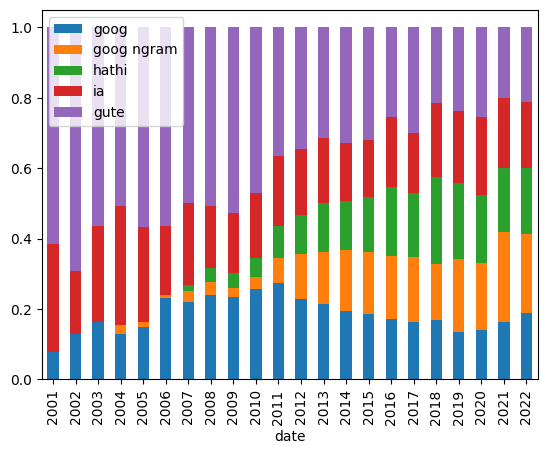

In [453]:
temp[["goog","goog ngram", "hathi", "ia", "gute", ]].plot(kind="bar", stacked=True).legend(loc='upper left')


In [454]:
df=df[df["year"]>2000]
df=df[df["year"]<2023]


<Axes: xlabel='date'>

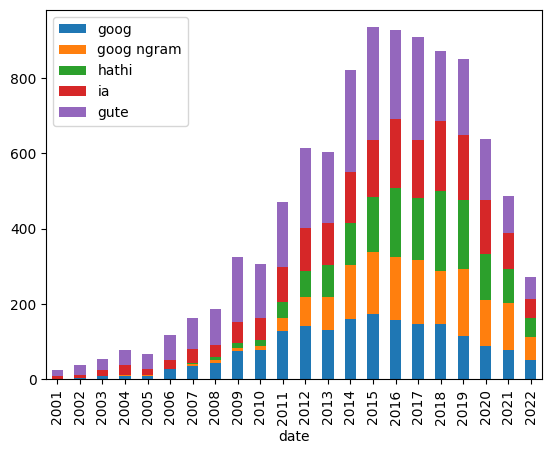

In [455]:
df[["goog","goog ngram", "hathi", "ia", "gute"]].groupby(df["date"].dt.year).sum().plot(kind="bar", stacked=True,)

In [402]:
year_ct=pd.read_csv("results-overview.csv")

In [403]:
year_ct=year_ct.set_index("year")

In [404]:
temp=df[["goog", "hathi", "ia", "gute", "goog ngram"]].groupby(df["date"].dt.year).sum()
temp=temp[temp.index>2000]
temp=temp[temp.index<2023]

In [405]:
temp=temp[temp.index>1999]
temp=temp[temp.index<2023]

In [406]:
temp["goog"]=temp["goog"]/year_ct["documents"]
temp["goog ngram"]=temp["goog ngram"]/year_ct["documents"]
temp["hathi"]=temp["hathi"]/year_ct["documents"]
temp["ia"]=temp["ia"]/year_ct["documents"]
temp["gute"]=temp["gute"]/year_ct["documents"]

In [407]:
temp

,goog,hathi,ia,gute,goog ngram
date,,,,,
2001,0.000005,0.000000,0.000020,0.000040,0.000000
2002,0.000013,0.000000,0.000018,0.000068,0.000000
2003,0.000022,0.000000,0.000036,0.000075,0.000000
2004,0.000023,0.000000,0.000059,0.000088,0.000005
2005,0.000022,0.000000,0.000039,0.000082,0.000002
2006,0.000055,0.000000,0.000047,0.000134,0.000002
2007,0.000069,0.000006,0.000072,0.000156,0.000010
2008,0.000081,0.000014,0.000060,0.000172,0.000013
2009,0.000089,0.000016,0.000064,0.000200,0.000009


<Axes: xlabel='date'>

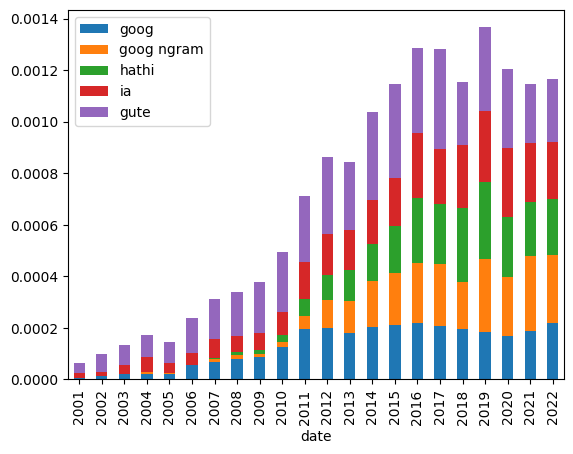

In [408]:
temp[["goog","goog ngram", "hathi", "ia", "gute", ]].plot(kind="bar", stacked=True,)

In [235]:
genre_scores=pd.read_csv("subj.csv")

In [236]:
genre_scores["title"]=genre_scores["title"].str.lower()

In [41]:
genre_scores=genre_scores.set_index("title")

In [42]:
gs=genre_scores.T

In [43]:
def cutoff(s):
    if s<0.6:
        return 0
    else:
        return s

In [44]:
filt=genre_scores.applymap(cutoff)

In [45]:
filt[filt["biological sciences"]>0.8]

,arts,philosophy,literature,applied philosophy,information science,computer science,social sciences,education,medicine,biology,...,educational psychology,philosophy of language,the humanities,bibliography,axiology,chemistry,industry,mathematical objects,judicial system,technology
title,,,,,,,,,,,,,,,,,,,,,
bibliography,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.951027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
on the original author and year of description of the extinct hyaenid pachycrocuta brevirostris,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.931406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total knowledge? encyclopedic handbooks in the twentieth-century chemical and life sciences,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.902266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
punnett squares and hybrid crosses: how mendelians learned their trade by the book,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.915228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fourier and agriculture,0.0,0.880141,0.0,0.943695,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
facts and arguments for darwin,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.804345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
national environmental policy 2013 adaptation strategies for sustainability of samburu pastoral community in samburu central subcounty kenya,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
from bioblasts to mitochondria ever expanding roles of mitochondria in cell physiology,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.743624,0.990152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [543]:
subj=pd.DataFrame()

In [544]:
df=pd.read_csv("full_meta.csv")

In [550]:
temp=df[df["goog"]==1].iloc[:, 5:-7]
subj["google books"]=temp.sum()

In [551]:
temp=df[df["goog ngram"]==1].iloc[:, 5:-7]
subj["google ngram"]=temp.sum()

In [552]:
temp=df[df["hathi"]==1].iloc[:, 5:-7]
subj["HathiTrust"]=temp.sum()

In [553]:
temp=df[df["ia"]==1].iloc[:, 5:-7]
subj["internet archive"]=temp.sum()

In [554]:
temp=df[df["gute"]==1].iloc[:, 5:-7]
subj["project gutenberg"]=temp.sum()

In [555]:
subj=subj[subj.sum(axis=1)>500]

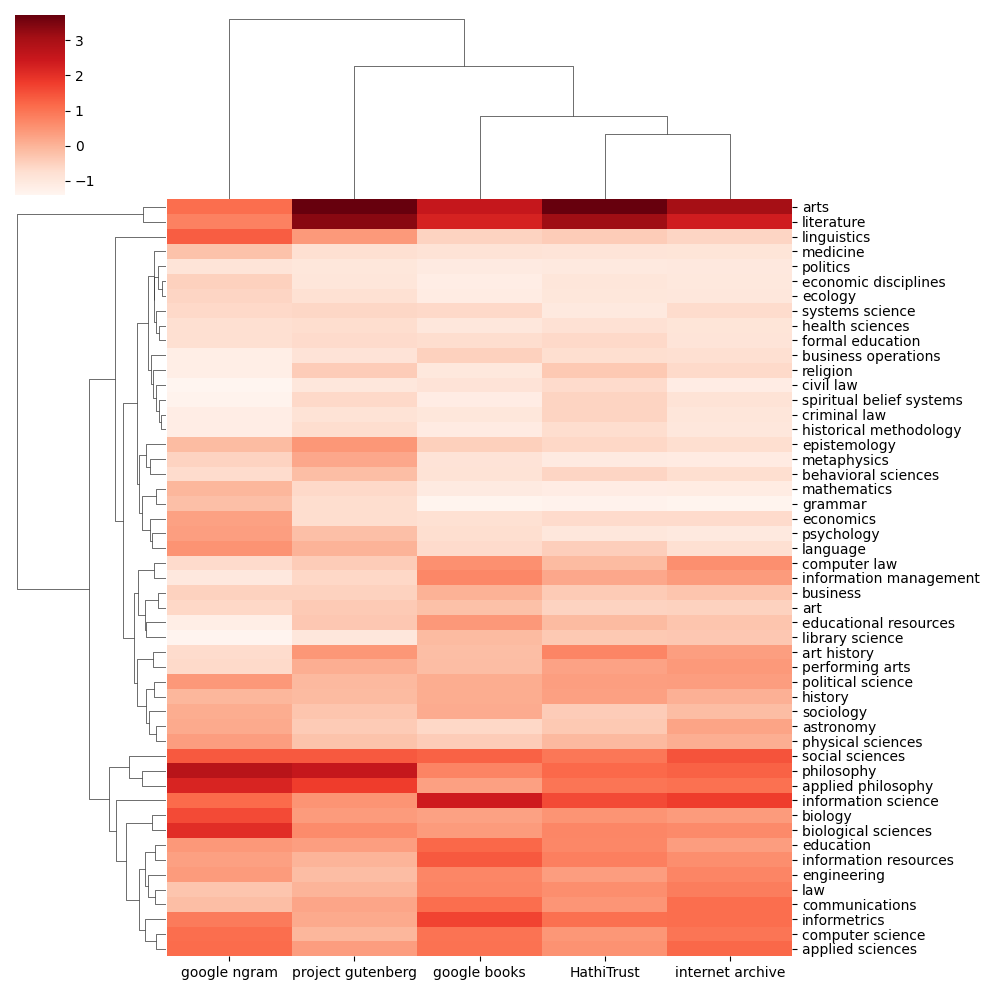

In [559]:
sns.clustermap(subj, z_score=1, yticklabels=True, cmap="Reds")


In [492]:
temp=df.iloc[:, 5:-7]

In [501]:
import seaborn as sns
import matplotlib.pyplot as plt

In [502]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster


In [512]:
pd.DataFrame(labels)[0].map(lut)

0     (0.12156862745098039, 0.4666666666666667, 0.70...
1     (0.17254901960784313, 0.6274509803921569, 0.17...
2     (0.12156862745098039, 0.4666666666666667, 0.70...
3     (0.17254901960784313, 0.6274509803921569, 0.17...
4     (0.8392156862745098, 0.15294117647058825, 0.15...
5     (0.8392156862745098, 0.15294117647058825, 0.15...
6     (0.5803921568627451, 0.403921568627451, 0.7411...
7     (0.8392156862745098, 0.15294117647058825, 0.15...
8     (0.8901960784313725, 0.4666666666666667, 0.760...
9     (0.8901960784313725, 0.4666666666666667, 0.760...
10    (0.8901960784313725, 0.4666666666666667, 0.760...
11    (0.8392156862745098, 0.15294117647058825, 0.15...
12    (0.8392156862745098, 0.15294117647058825, 0.15...
13    (0.4980392156862745, 0.4980392156862745, 0.498...
14    (0.5803921568627451, 0.403921568627451, 0.7411...
15    (0.12156862745098039, 0.4666666666666667, 0.70...
16    (0.8392156862745098, 0.15294117647058825, 0.15...
17    (0.5490196078431373, 0.33725490196078434, 

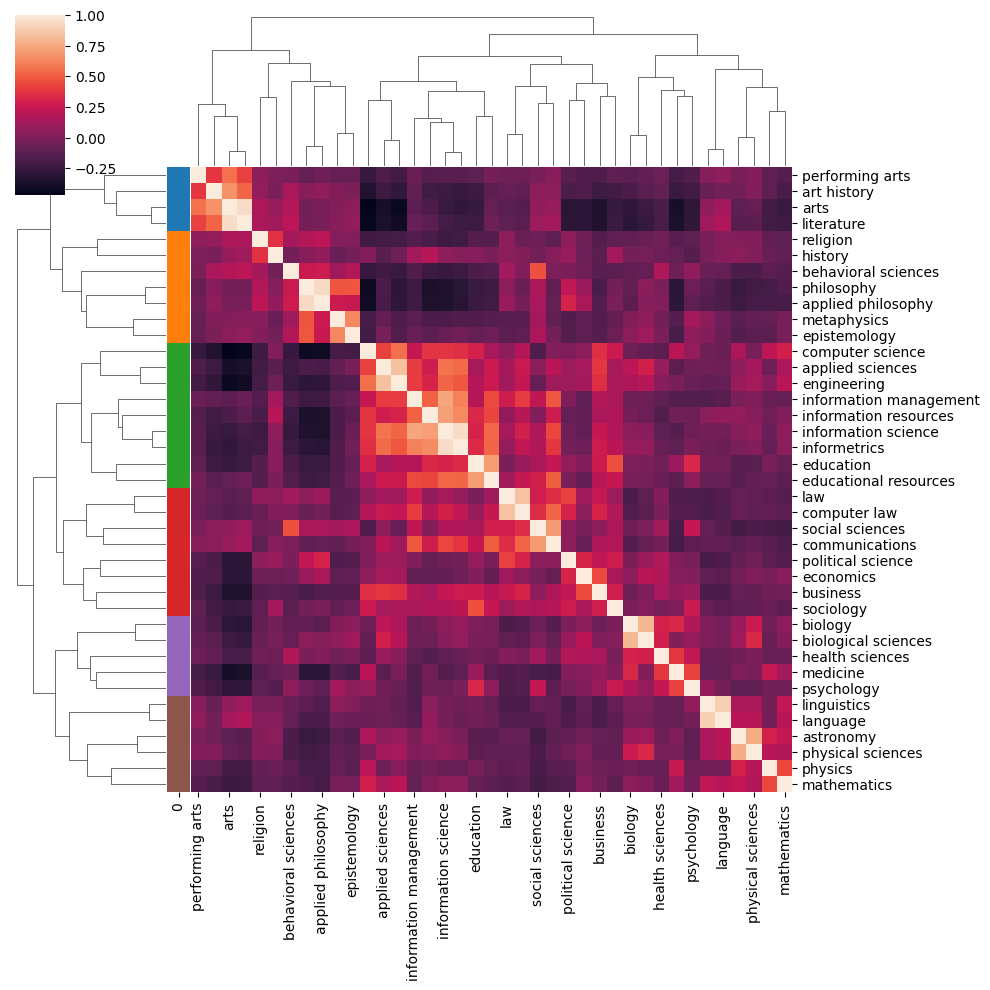

In [517]:
corr_matrix = genre_scores.iloc[:, : 40].corr()
Z = linkage(corr_matrix, 'average')
clust=fcluster(Z, 6, criterion='maxclust')
labels = clust
lut = dict(zip(set(labels), sns.color_palette()))
row_colors = pd.DataFrame(labels)[0].map(lut)
row_colors.index=corr_matrix.index 
sns.clustermap(corr_matrix, yticklabels=True, row_colors=row_colors)
plt.show()

<Axes: >

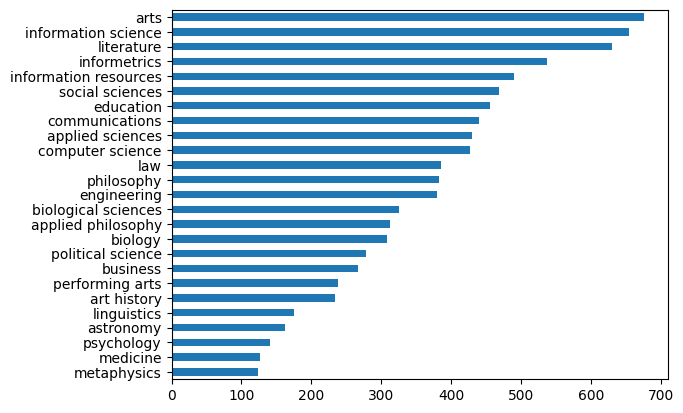

In [490]:
temp.sum().head(25).sort_values(ascending=True).plot.barh()

In [456]:
subjs=["literature", "philosophy", "social sciences", "biological sciences", "information science", "art history", "law", "psychology", "information resources", "linguistics", "applied sciences", "communications", "computer science"]

In [457]:
t=df[df["chemistry"]>0.8]

In [463]:
df.to_csv("full_meta.csv")

In [459]:
t[t["hathi"]==1]["text"].iloc[1]

'      like like   sirna launching buschmann phase group nanomaterials nanomaterials frame    title title international international international international international hwang httpsorcidorg  submissions p more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more  supervision    section section section section section section section section  radial radial basic asked   derived derived completed too too    lucchesi lucchesi reuse older kallos region unsteadystate discussion  award award production clearly sustainable sustainable sustainable sustainable sustainable programming shu amundson   energy energy energy energy energy energy energy energy spain mckay  prominent prominent require require champagne sponsors sponsors curation curation jou contributing contributing contributing contributing contributing topics years years years years protein engineering means after after flow renewable r

In [460]:
out=pd.DataFrame()
for s in list(df.columns)[4:-7]:
    temp=df[df[s]>0.75][["hathi","goog ngram","goog", "ia", "gute"]].sum()
    temp=temp/temp.sum()
    out[s]=temp

In [461]:
out

,arts,philosophy,literature,applied philosophy,information science,computer science,social sciences,education,medicine,biology,...,educational psychology,philosophy of language,the humanities,bibliography,axiology,chemistry,industry,mathematical objects,judicial system,technology
hathi,0.193098,0.088692,0.184948,0.106890,0.186029,0.134707,0.107251,0.157627,0.077586,0.125616,...,0.027027,0.019231,0.222222,0.166667,0.04,0.4,0.272727,0.029412,0.207547,0.000000
goog ngram,0.051356,0.198817,0.050172,0.212898,0.096324,0.191759,0.184290,0.115254,0.310345,0.236453,...,0.243243,0.250000,0.388889,0.095238,0.20,0.0,0.136364,0.147059,0.150943,0.151515
goog,0.178307,0.127864,0.187408,0.112191,0.301471,0.253566,0.176737,0.303390,0.215517,0.169951,...,0.202703,0.038462,0.333333,0.380952,0.02,0.2,0.204545,0.117647,0.188679,0.212121
ia,0.182416,0.138950,0.163305,0.174028,0.220588,0.301109,0.226586,0.130508,0.112069,0.172414,...,0.135135,0.134615,0.055556,0.357143,0.06,0.2,0.181818,0.323529,0.169811,0.242424
gute,0.394823,0.445676,0.414166,0.393993,0.195588,0.118859,0.305136,0.293220,0.284483,0.295567,...,0.391892,0.557692,0.000000,0.000000,0.68,0.2,0.204545,0.382353,0.283019,0.393939


<Axes: >

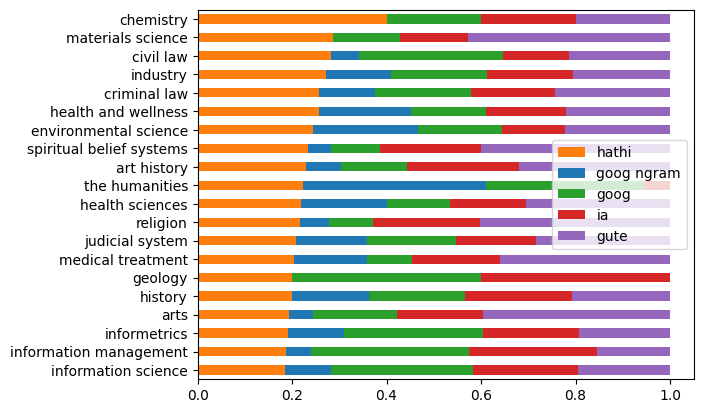

In [462]:
out.T.sort_values("hathi", ascending=True).tail(20).plot.barh(color=["C1", "C0", "C2", "C3", "C4"],stacked=True)

In [78]:
genre_scores

,arts,philosophy,literature,applied philosophy,information science,computer science,social sciences,education,medicine,biology,...,educational psychology,philosophy of language,the humanities,bibliography,axiology,chemistry,industry,mathematical objects,judicial system,technology
title,,,,,,,,,,,,,,,,,,,,,
the development of japan special operations command’s capability: 21<sup>st</sup> century samurai diplomats,0.013427,0.723582,0.011400,0.832795,0.036528,0.172655,0.064604,0.158576,0.027470,0.165953,...,0.007174,0.009441,0.012665,0.008158,0.027019,0.012110,0.019797,0.010348,0.071776,0.133226
@philostei:,0.061562,0.019572,0.054062,0.011262,0.732200,0.638306,0.016088,0.070499,0.022492,0.058172,...,0.009547,0.013960,0.020503,0.015677,0.006245,0.006694,0.008328,0.007745,0.002419,0.024353
"neither high-church, low-church, nor no-church: religious dissatisfaction and dissent in bleak house",0.782757,0.417386,0.706332,0.590022,0.005373,0.013934,0.084125,0.021402,0.010325,0.023464,...,0.009289,0.079955,0.003719,0.004662,0.022680,0.006697,0.008279,0.015816,0.013782,0.010212
searching for dr. johnson:,0.308777,0.039637,0.253529,0.018270,0.826431,0.331564,0.235506,0.268903,0.014610,0.108977,...,0.006748,0.005401,0.004819,0.026760,0.004695,0.007714,0.026478,0.007122,0.006553,0.008051
“research based advocacy for policy change: ban or restrict & discourage mercury amalgam use to safeguard children’s health in pakistan”,0.070391,0.075845,0.072726,0.059721,0.021697,0.269886,0.054030,0.397772,0.538053,0.156866,...,0.020070,0.008230,0.025195,0.021361,0.011038,0.030103,0.934302,0.015743,0.016989,0.040605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
targeting in online marketing a retrospective analysis with a focus on practices of facebook google linkedin and tiktok,0.022754,0.014300,0.014810,0.011223,0.223785,0.791667,0.130146,0.118893,0.086119,0.129671,...,0.006518,0.010642,0.032833,0.042750,0.009655,0.019531,0.036029,0.010095,0.007049,0.022359
associations between sociodemographic factors and hypertension management during the covid19 pandemic preliminary findings from malaysia,0.009857,0.018586,0.008294,0.012977,0.017657,0.087841,0.117492,0.188334,0.999112,0.159498,...,0.043992,0.008217,0.022018,0.006853,0.006619,0.027555,0.155761,0.009596,0.008507,0.014168
psychoactive substance use among medical residents in tunisia,0.032889,0.067609,0.031956,0.057237,0.014298,0.108637,0.313190,0.125341,0.977462,0.257148,...,0.035190,0.020541,0.033587,0.015391,0.009315,0.078064,0.060265,0.009855,0.020916,0.017205


In [51]:
genre_scores = genre_scores[~genre_scores.index.duplicated(keep='first')]


In [120]:
df=df.set_index("title")

In [126]:
df=df[["date", "author", "text"]]

In [127]:
df=df.join(genre_scores)

In [128]:
df

,date,author,text,arts,philosophy,literature,applied philosophy,information science,computer science,social sciences,...,educational psychology,philosophy of language,the humanities,bibliography,axiology,chemistry,industry,mathematical objects,judicial system,technology
title,,,,,,,,,,,,,,,,,,,,,
the development of japan special operations command’s capability: 21<sup>st</sup> century samurai diplomats,2017-05-24 00:00:00+00:00,['Ryota Akiba'],the development of japan special operations co...,0.013427,0.723582,0.011400,0.832795,0.036528,0.172655,0.064604,...,0.007174,0.009441,0.012665,0.008158,0.027019,0.012110,0.019797,0.010348,0.071776,0.133226
@philostei:,2017-01-01 00:00:00+00:00,[],up odijk odijkprinter page chapter philo...,0.061562,0.019572,0.054062,0.011262,0.732200,0.638306,0.016088,...,0.009547,0.013960,0.020503,0.015677,0.006245,0.006694,0.008328,0.007745,0.002419,0.024353
"neither high-church, low-church, nor no-church: religious dissatisfaction and dissent in bleak house",2018-01-01 00:00:00+00:00,['Christian Dickinson'],dickstudannu dickens studies annual vol no ...,0.782757,0.417386,0.706332,0.590022,0.005373,0.013934,0.084125,...,0.009289,0.079955,0.003719,0.004662,0.022680,0.006697,0.008279,0.015816,0.013782,0.010212
searching for dr. johnson:,2018-01-01 00:00:00+00:00,[],part archival limits un chapter searching for...,0.308777,0.039637,0.253529,0.018270,0.826431,0.331564,0.235506,...,0.006748,0.005401,0.004819,0.026760,0.004695,0.007714,0.026478,0.007122,0.006553,0.008051
“research based advocacy for policy change: ban or restrict & discourage mercury amalgam use to safeguard children’s health in pakistan”,2018-09-01 00:00:00+00:00,"['Shiza Durrani', 'Hafsa Bashir', 'Mahmood A. ...",executive summary this report describes and di...,0.070391,0.075845,0.072726,0.059721,0.021697,0.269886,0.054030,...,0.020070,0.008230,0.025195,0.021361,0.011038,0.030103,0.934302,0.015743,0.016989,0.040605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
targeting in online marketing a retrospective analysis with a focus on practices of facebook google linkedin and tiktok,2023-01-04 00:00:00+00:00,"['Z. Somosi', 'Noémi Hajdú', 'L. Molnár']",research article european journal of business ...,0.022754,0.014300,0.014810,0.011223,0.223785,0.791667,0.130146,...,0.006518,0.010642,0.032833,0.042750,0.009655,0.019531,0.036029,0.010095,0.007049,0.022359
associations between sociodemographic factors and hypertension management during the covid19 pandemic preliminary findings from malaysia,2021-09-01 00:00:00+00:00,"['M. Elnaem', 'Nur Hasyimah Kamarudin', 'N. Sy...",research article open access associations betw...,0.009857,0.018586,0.008294,0.012977,0.017657,0.087841,0.117492,...,0.043992,0.008217,0.022018,0.006853,0.006619,0.027555,0.155761,0.009596,0.008507,0.014168
psychoactive substance use among medical residents in tunisia,2022-06-01 00:00:00+00:00,"['R. Masmoudi', 'I. Chaari', 'Y. Mejdoub', 'R....",introduction depression is a common psychiatri...,0.032889,0.067609,0.031956,0.057237,0.014298,0.108637,0.313190,...,0.035190,0.020541,0.033587,0.015391,0.009315,0.078064,0.060265,0.009855,0.020916,0.017205


In [54]:
gs["quantitative analysis of culture using millions of digitized books"].sort_values(ascending=False)

art                    0.843293
biological sciences    0.778669
biology                0.761438
cond-mat.stat-mech     0.613523
language               0.452312
                         ...   
judicial system        0.005806
metaphysics            0.005786
civil law              0.005218
axiology               0.003858
data products          0.003373
Name: quantitative analysis of culture using millions of digitized books, Length: 80, dtype: float64

In [55]:
df.to_csv("final.csv")

In [119]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988],
      dtype='object', length=9989)

In [100]:
genre_scores.index

Index(['the development of japan special operations command’s capability: 21<sup>st</sup> century samurai diplomats',
       '@philostei:',
       'neither high-church, low-church, nor no-church: religious dissatisfaction and dissent in bleak house',
       'searching for dr. johnson:',
       '“research based advocacy for policy change: ban or restrict & discourage mercury amalgam use to safeguard children’s health in pakistan”',
       'state government and urban revitalization: how states can foster stronger, more inclusive cities',
       'towards independence', 'index', 'prologue',
       'tainted idyll: water pollution in nineteenth-century mahopac, new york',
       ...
       'habits of food consumers in the post covid era',
       'utilitybased link recommendation for online social networks',
       'the impact of coviewing on attachment between parents and children',
       'the google book settlement an international library view',
       'chatbots and the new world of hci',